In [33]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [34]:
df = pd.read_csv('micro_world.csv', engine='python')

In [35]:
df = df[df['economy'] == 'Philippines']
df.head(5)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,4,2,2,4.0,2,3.0,0.0,NaN,0.0,NaN
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,1,4,4,4.0,4,1.0,0.0,0.0,1.0,1.0
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,4,2,2,4.0,2,5.0,0.0,NaN,0.0,NaN
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,1,1,4,2.0,2,1.0,0.0,NaN,0.0,NaN


In [49]:
df['FI are too far away'] = df.apply(
    lambda x: 1 if x['fin11a'] == 1  else 0,
    axis=1
    )
df['FS are too expensive'] = df.apply(
    lambda x: 1 if x['fin11b'] == 1  else 0,
    axis=1
    )
df['No necessary documentation'] = df.apply(
    lambda x: 1 if x['fin11c'] == 1  else 0,
    axis=1
    )
df['No trust in FI'] = df.apply(
    lambda x: 1 if x['fin11d'] == 1  else 0,
    axis=1
    )
df['Religious reasons'] = df.apply(
    lambda x: 1 if x['fin11e'] == 1  else 0,
    axis=1
    )
df['Not enough money to use FI'] = df.apply(
    lambda x: 1 if x['fin11f'] == 1  else 0,
    axis=1
    )
df['Family already has account'] = df.apply(
    lambda x: 1 if x['fin11g'] == 1  else 0,
    axis=1
    )
df['No need for FS at a formal institution'] = df.apply(
    lambda x: 1 if x['fin11h'] == 1  else 0,
    axis=1
    )

In [50]:
reasons = df.groupby(['economy']).agg(
    FI_are_too_far_away=('FI are too far away', 'sum'),
    FS_are_too_expensive = ('FS are too expensive', 'sum'),
    No_necessary_documentation = ('No necessary documentation', 'sum'),
    No_trust_in_FI = ('No trust in FI', 'sum'),
    Religious_reasons = ('Religious reasons', 'sum'),
    Not_enough_money_to_use_FI = ('Not enough money to use FI', 'sum'),
    Family_already_has_account = ('Family already has account', 'sum'),
    No_need_for_FS = ('No need for FS at a formal institution', 'sum')  
).reset_index()
reasons

,economy,FI_are_too_far_away,FS_are_too_expensive,No_necessary_documentation,No_trust_in_FI,Religious_reasons,Not_enough_money_to_use_FI,Family_already_has_account,No_need_for_FS
0,Philippines,283,370,307,146,95,477,176,276


In [55]:
reason_table = pd.melt(
    reasons,
    id_vars=['economy'],
    value_vars=['FI_are_too_far_away', 'FS_are_too_expensive', 'No_necessary_documentation', 'No_trust_in_FI', 'Religious_reasons', 'Not_enough_money_to_use_FI',
               'Family_already_has_account', 'No_need_for_FS' ]
)

In [60]:
reason_table = reason_table.replace(
{
        'FI_are_too_far_away' : 'FI are too far away',
        'FS_are_too_expensive' : 'FS are too expensive',
        'No_necessary_documentation' : 'No necessary documentation',
        'No_trust_in_FI' : 'No trust in FI',
        'Religious_reasons': 'Religious reasons',
        'Not_enough_money_to_use_FI': 'Not enough money to use FI',
        'Family_already_has_account': 'Family already has an account',
        'No_need_for_FS': 'No need for formal FI'
        }
)
reason_table

,economy,variable,value
0,Philippines,FI are too far away,283
1,Philippines,FS are too expensive,370
2,Philippines,No necessary documentation,307
3,Philippines,No trust in FI,146
4,Philippines,Religious reasons,95
5,Philippines,Not enough money to use FI,477
6,Philippines,Family already has an account,176
7,Philippines,No need for formal FI,276


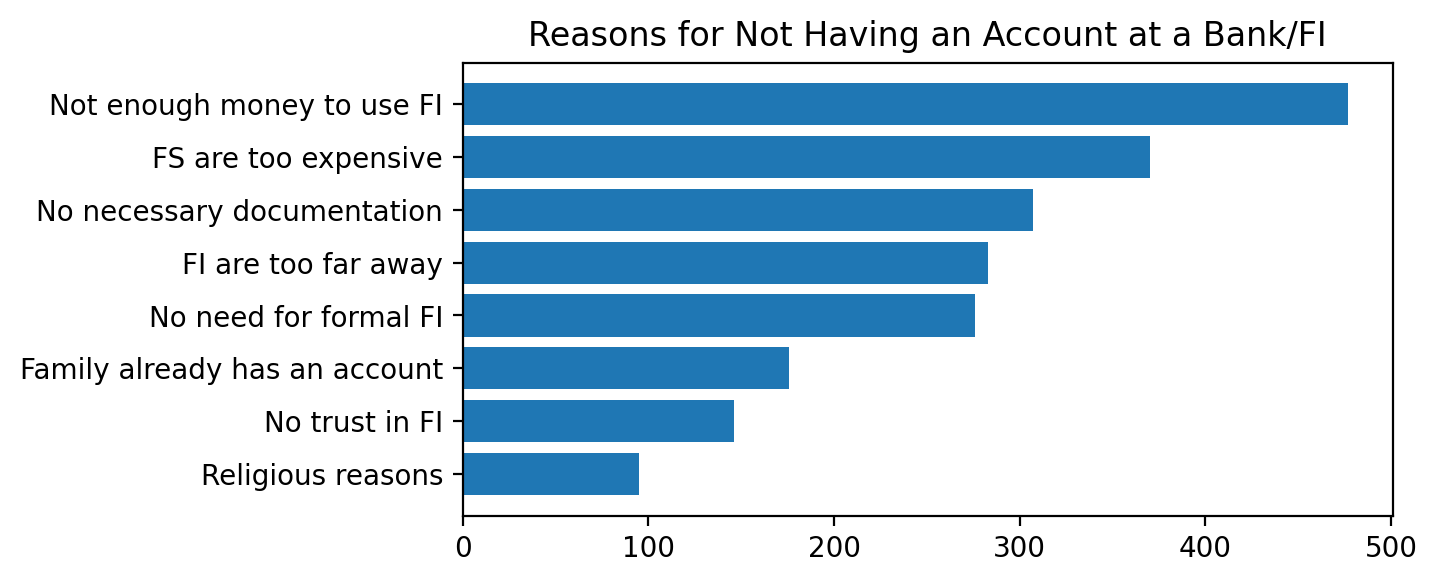

In [65]:
reason_table =reason_table.sort_values('value', ascending=True).head(10).reset_index(drop=True)
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

plt.barh(
    reason_table['variable'],
    reason_table['value']
)

# Set title
plt.title('Reasons for Not Having an Account at a Bank/FI')

# Set labels

# Show figure
plt.show()
# Show figure
plt.show()